<hr/>

# Foundations of Reinforcement Learning

<hr/>

<h1><font color="darkblue">Lab 2: Multi-armed Bandit </font></h1>



<img src="multiarmedbandit.jpg" width="300" height="300" align="left"/>


<br><br><br><br><br><br><br><br><br><br><br><br>


[image source](https://www.microsoft.com/en-us/research/?from=http%3A%2F%2Fresearch.microsoft.com%2Fen-us%2Fprojects%2Fbandits%2F)



##  Content
1. Problem statement
0. Greedy and $\epsilon$-greedy Algorithm
0. UCB Action Selection Algorithm


In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

Populating the interactive namespace from numpy and matplotlib


## Problem Statement [P 21, Ch 2.3, Sutton]

#### Define a 10-armed bandit problem in which the action values $q_*(a)$, $a = 1,...,10$, are samples from a standard norm distribution, i.e. Gaussian distribution with mean $= 0$ and variance $ = 1$. Then, when selected $A_t$ at time step $t$, the actual reward, $R_t$ is selected from a Gaussian distribution with mean = $q_*(A_t)$ and variance = 1.

In [22]:
# write any global function here if needed

# Constant for number of arms 
NUM_ARMS = 10

# True action values q*(a)
true_action_values = np.random.normal(0, 1, NUM_ARMS) 

# Initialize Q-values and action counts
Q = np.zeros(NUM_ARMS)  # Estimated action values
N = np.zeros(NUM_ARMS)  # Action counts


## Problem 1.  Greedy and $\epsilon$-greedy algorithm

1. Implement a function/functions that run this game 2000 times with $\epsilon$-greedy algorithm. Your function/functions should take $\epsilon$ as one of the inputs and output: (7 pts)
<br>   (a) average reward at each time step
<br>   (b) percentage of optimal action at each time step. (optimal action is defined by $a^* = arg\underset{a}max           \, q^*(a)$ )
2. Call your function/functions to generate the average reward and percentage of optimal action at each time step with: (1 pts)
<br>   (a) Greedy-algorithm 
<br>   (b) $\epsilon$-greedy algorithm, $\epsilon=0.01$ 
<br>   (c) $\epsilon$-greedy algorithm, $\epsilon=0.1$. 
3. Plot the average reward and percentage of optimal action of those three cases and compare with [P 23 Fig 2.2 Sutton]. (2 pts)

```### 1.

In [28]:
def multi_armed(num_arms, time_step_num, epsilon):

    #implement epsilon-greedy algorithm

    # Lists to store rewards and optimal action choices
    reward_history = []
    optimal_action_history = []

    # Main loop
    for _ in range(time_step_num):
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            # Exploration: Choose a random action
            action = np.random.choice(num_arms)
        else:
            # Exploitation: Choose the action with the highest estimated value
            action = np.argmax(Q)

        # Simulate the reward for the chosen action
        reward = np.random.normal(true_action_values[action], 1)

        # Update action counts
        N[action] += 1

        # Update estimated action value using sample average
        Q[action] += (reward - Q[action]) / N[action]

        # Store rewards and optimal action choices for plotting
        reward_history.append(reward)
        optimal_action_history.append(action == np.argmax(true_action_values))

    # Calculate the cumulative average reward
    ave_reward = np.cumsum(reward_history) / np.arange(1, time_step_num + 1)

    # Calculate the percentage of times the optimal action was chosen
    ave_opt_action = np.cumsum(optimal_action_history) / np.arange(1, time_step_num + 1)

    
    # return: 
    ## ave_reward: 
    ##    size: (time_step_num, )
    ##    value: average reward over 2000 runs at each time step
    ## ave_opt_action: 
    ##    size: (time_step_num, )
    ##    value: (0-100) percentage of optimal action taken over 2000 runs at each time step
    
    return ave_reward, ave_opt_action    

### 2.

In [25]:
# call your function
NUM_GAMES=2000
NUM_ARMS = 10

# Greedy Algorithm
greedy_rewards, greedy_optimal_actions = multi_armed(num_arms=NUM_ARMS, time_step_num=NUM_GAMES, epsilon=0)

# Epsilon-Greedy Algorithm, epsilon=0.01
epsilon_001_rewards, epsilon_001_optimal_actions = multi_armed(num_arms=NUM_ARMS, time_step_num=NUM_GAMES, epsilon=0.01)

# Epsilon-Greedy Algorithm, epsilon=0.1
epsilon_01_rewards, epsilon_01_optimal_actions = multi_armed(num_arms=NUM_ARMS, time_step_num=NUM_GAMES, epsilon=0.1)


### 3.

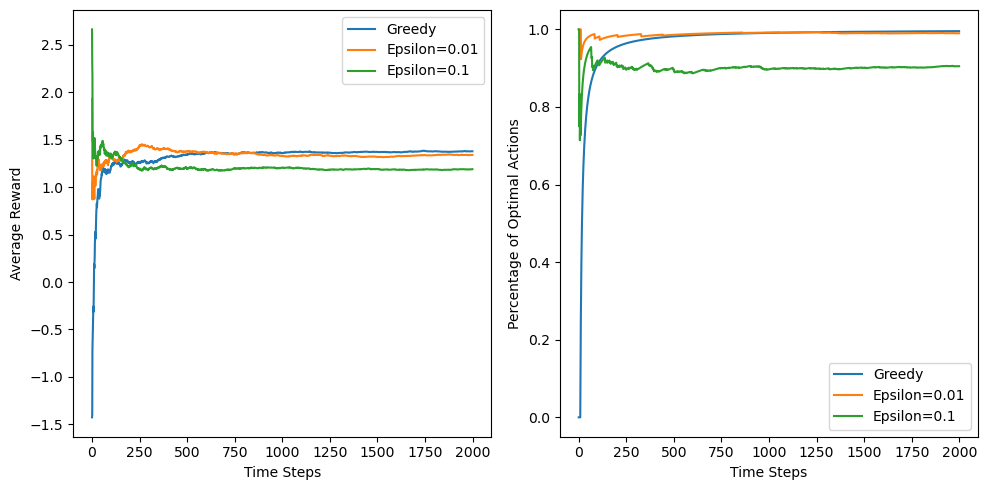

In [29]:
# plot your results

# Plot average rewards
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(greedy_rewards, label="Greedy")
plt.plot(epsilon_001_rewards, label="Epsilon=0.01")
plt.plot(epsilon_01_rewards, label="Epsilon=0.1")
plt.xlabel("Time Steps")
plt.ylabel("Average Reward")
plt.legend()

# Plot percentage of optimal actions
plt.subplot(1, 2, 2)
plt.plot(greedy_optimal_actions, label="Greedy")
plt.plot(epsilon_001_optimal_actions, label="Epsilon=0.01")
plt.plot(epsilon_01_optimal_actions, label="Epsilon=0.1")
plt.xlabel("Time Steps")
plt.ylabel("Percentage of Optimal Actions")
plt.legend()

plt.tight_layout()
plt.show()

### Explanation

My results differ slightly from the diagram in the textbook. In the first plot which displays average reward of the three algorithms over time, I get a rapid increase from greedy which then plateaus very quickly. In the textbook we also see this plateau, but without the large initial first jump in average reward. My epsilon of 0.01 had a slightly different trajectory versus the one in the texbook. Mine started with a very high average reward and then dropped and quickly plateaued to a similar value of the greedy, unlike the textbook where the e 0.01 started small and then increased, and finally plateaued. The same thing happened with the epsiolon 0.1 algorith, where it started high but actually finished with the lowest average reward, contrary to what the chart says in the textbook. I am not sure why this occured - the algorithm takes the same steps per algorith, with exploration being more encouraged in the higher epsilon values. 

For the average reward, my greedy algorithm shot up to a pretty high percentage, higher than what the textbook has (30% versus close to 88%). My epsilon 0.1 algorithm started really high and dipped, then shooting back up to a lower percentage than the greedy algorithm which is strange because the exploration should give the epsilon 0.1 a higher optimal action than the greedy. My epsilon 0.01 stayed at a very high percentage the entire time, contrary to the textbook where it got to around a 50% optimal rate versus mine which was close to 90.

I am not entirely sure what could have caused these differences. There is a probability component to this algorithm, so it is a stochastic system. Getting differences in results is possible, however there are some odd differences between the two sets of data. Perhaps a slight difference in setting up Gaussian distrobutions could have made some sort of impact when running these algorithm simulations. 

## Problem 2.  UCB Action Selection

1. Implement a function/functions that run this game 2000 times with UCB Action Selection algorithm. Your function/functions should take $c$ as one of the inputs and output: (7 pts)
<br>   - average reward at each time step.
2. Call your function/functions to generate the average reward at each time step with: (1 pts)
<br>   - UCB Action Selection algorithm, $c = 2$.
3. Plot the average reward of 2.2 and 1.2c, then compare with [P 28 Fig 2.4 Sutton]. (2 pts)

### 1.

In [36]:
# Number of arms
num_arms = 10

# True mean reward for each arm (normally distributed)
true_mean_rewards = np.random.normal(0, 1, num_arms)

In [41]:
def multi_armed_UCB(arm_num, time_step_num, c):

    # Initialize arrays to track rewards and action counts
    total_rewards = np.zeros(time_step_num)
    action_counts = np.zeros(arm_num)
    optimal_action_counts = np.zeros(time_step_num)

    for i in range(time_step_num):
        ucb_values = np.zeros(arm_num)
        
        # Calculate UCB values for each arm
        for arm in range(arm_num):
            if action_counts[arm] == 0:
                ucb_values[arm] = np.inf  # Initialize to infinity for unexplored arms
            else:
                exploration_bonus = c * np.sqrt(np.log(i + 1) / action_counts[arm])
                ucb_values[arm] = true_mean_rewards[arm] + exploration_bonus
        
        # Choose the action with the highest UCB value
        chosen_action = np.argmax(ucb_values)

        # Check if the chosen action is the optimal action
        is_optimal_action = (chosen_action == np.argmax(true_mean_rewards))
        
        # Simulate a reward for the chosen action
        reward = np.random.normal(true_mean_rewards[chosen_action], 1)
        
        # Update action counts and total rewards
        action_counts[chosen_action] += 1
        total_rewards[i] = reward

        # Update optimal action counts
        optimal_action_counts[t] = is_optimal_action

    # Calculate the cumulative average reward
    ave_reward = np.cumsum(total_rewards) / np.arange(1, time_step_num + 1)
    ave_opt_action = np.cumsum(optimal_action_counts) / np.arange(1, time_step_num + 1)
    
    # return: 
    ## ave_reward: 
    ##    size: (time_step_num, )
    ##    value: average reward over 2000 runs at each time step
    ## ave_opt_action: 
    ##    size: (time_step_num, )
    ##    value: (0-100) percentage of optimal action taken over 2000 runs at each time step
    
    
    return ave_reward, ave_opt_action
    

### 2.

In [40]:
# Call UCB for c value 2
reward_c_2 , ave_opt_c_2 = multi_armed_UCB(arm_num=10, time_step_num=2000, c=2)

### 3.

Text(0.5, 1.0, 'UCB Action Selection for Multi-Armed Bandit C = 1.2')

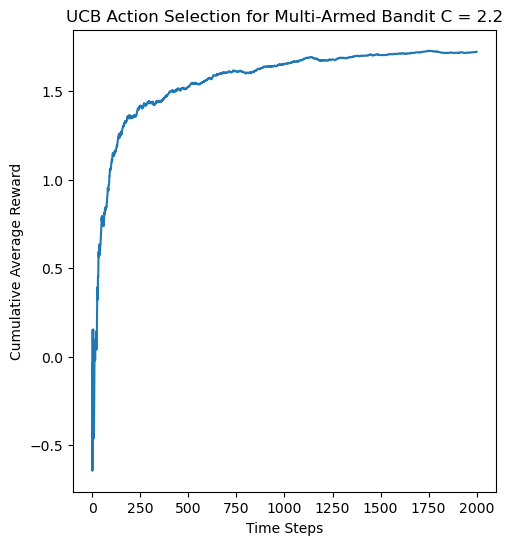

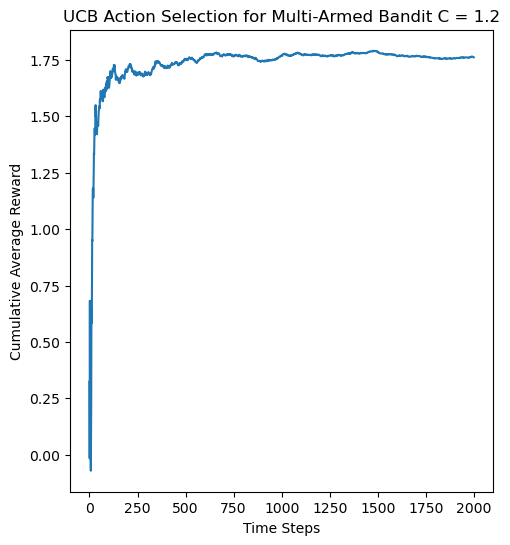

In [53]:
# Call UCB for c values 1.2 and 2.2
reward_c_2_2 , ave_opt_c_2_2 = multi_armed_UCB(arm_num=10, time_step_num=2000, c=2.2)
reward_c_1_2 , ave_opt_c_1_2 = multi_armed_UCB(arm_num=10, time_step_num=2000, c=1.2)

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(reward_c_2_2)
plt.xlabel('Time Steps')
plt.ylabel('Cumulative Average Reward')
plt.title('UCB Action Selection for Multi-Armed Bandit C = 2.2')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(reward_c_1_2)
plt.xlabel('Time Steps')
plt.ylabel('Cumulative Average Reward')
plt.title('UCB Action Selection for Multi-Armed Bandit C = 1.2')

### Explanation

In this case, the 1.2, 2.2, and 2.0 all get very similar results to the figure in the textbook. The average rewards seem to range from 1.5 to 
1.75 depending on c parameter. The c value of 1.2 seemed to have the highest average reward within the same range as the textbook. Clearly a c parameter value between 1.2 and 2.2 seems to be optimal, especially with 2 being the default c parameter, just like how 0.1 seemed to the the default epsilon for the greedy algorithms. 